In [39]:
from scipy.io import loadmat
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pylab as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

#Loading datasets
mat = loadmat("thyroidTrain.mat")
trainThyroidInput = mat["trainThyroidInput"]
trainThyroidOutput= mat["trainThyroidOutput"]
#display subset of the data
print("trainThyroidInput shape",trainThyroidInput.shape)
print("trainThyroidOutput shape",trainThyroidOutput.shape)
print("\nsmall subset trainThyroidInput\n")
print(trainThyroidInput[:10,:14])
print("\nsmall subset of trainThyroidOutput\n")
print(trainThyroidOutput[:10])

trainThyroidInput shape (5000, 21)
trainThyroidOutput shape (5000, 3)

small subset trainThyroidInput

[[0.28 0.   1.   0.   0.   0.   1.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.45 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.77 0.   0.   0.   0.   0.   0.   0.   0.   1.   1.   0.   0.   0.  ]
 [0.72 0.   1.   0.   1.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.78 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.74 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.48 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.51 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.45 1.   0.   0.   0.   1.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.46 1.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]]

small subset of trainThyroidOutput

[[0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 1 0]
 [0 0 1]
 [0 0 1]
 [0 0 1]]


In [40]:
# Setting up a new trainOutput array
trainOutput = np.zeros(trainThyroidOutput.shape[0])

for i in range(len(trainThyroidOutput)):
    if trainThyroidOutput[i][0] == 1:
        trainOutput[i] = 1
    elif trainThyroidOutput[i][1] == 1:
        trainOutput[i] = 2
    elif trainThyroidOutput[i][2] == 1:
        trainOutput[i] = 3
        
print(trainOutput)


pca = PCA(n_components=2)
pca1=pca.fit_transform(trainThyroidInput)
#cancerTrainX=pca.fit_transform(cancerTrainX)
#trainThyroidOutput=trainThyroidOutput.reshape(len(trainThyroidInput_pca))

#printing the subset of cancerTrainX and cancerTrainY
print(trainThyroidInput_pca[:2])
print(trainThyroidOutput[:2])

[3. 3. 3. ... 3. 1. 3.]
[[-4.25832468e-03  7.32175858e-01 -1.42659502e-01 -7.05370026e-02
   9.14025044e-02  6.52009793e-02  1.58463307e-01  4.87371464e-02
   9.31391528e-02 -6.35016622e-02  5.94074208e-03  3.28162264e-02
   4.92238976e-02  3.91294990e-01  5.16791427e-01 -2.95104869e-02
  -2.68465488e-02  2.33321446e-02]
 [-3.79072084e-01 -1.97477055e-01 -6.29405322e-02 -1.55545704e-02
   5.21134042e-04 -2.29589267e-02  4.64942135e-02  8.46944024e-02
  -2.83295881e-02  4.64921225e-03  1.60179879e-03 -4.73677518e-03
  -3.55008077e-03 -1.00612524e-02 -2.84539040e-03 -4.47949061e-02
   1.90597980e-02  1.55529003e-02]]
[[0 0 1]
 [0 0 1]]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if __name__ == '__main__':


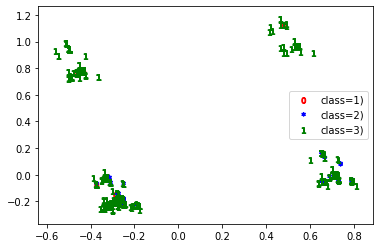

In [41]:
fig,ax=plt.subplots()
X0 = pca1[trainOutput==1]
X1 = pca1[trainOutput==2]
X2 = pca1[trainOutput==3]
ax.scatter(X0[:,0], X0[:,1], color="red", marker="$0$", label="class=1)")
ax.scatter(X1[:,0], X1[:,1], color="blue", marker="$*$", label="class=2)")
ax.scatter(X2[:,0], X2[:,1], color="green", marker="$1$", label="class=3)")
ax.legend()
fig.show() 

In [42]:
#By Using ANN
import numpy as np 
import matplotlib.pyplot as plt
import sklearn
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor

# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score



X_train, X_test, y_train, y_test = train_test_split(trainThyroidInput, trainThyroidOutput, test_size=0.30, random_state=40)
print(X_train.shape); print(X_test.shape)



(3500, 21)
(1500, 21)


In [53]:
mlp = MLPClassifier(hidden_layer_sizes=(50,50,50),alpha=0.03, activation='relu', solver='adam', max_iter=100)
mlp.fit(X_train,y_train)

predict_train = mlp.predict(X_train)
predict_test = mlp.predict(X_test)
#print(predict_test[:10])
#print(len(predict_test))
print()

from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test,predict_test)
print("Accuracy with  50,50,50:",acc)


Accuracy with  50,50,50: 0.9566666666666667


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [72]:
mlp1 = MLPClassifier(hidden_layer_sizes=(60,80,90), activation='relu', solver='adam', max_iter=500)
mlp1.fit(X_train,y_train)
#2nd model
mlp2 = MLPClassifier(hidden_layer_sizes=(10,10,10), activation='relu', solver='adam', max_iter=500)
mlp2.fit(X_train,y_train)
#3rd model
mlp3 = MLPClassifier(hidden_layer_sizes=(10,20,30), activation='relu', solver='adam', max_iter=500)
mlp3.fit(X_train,y_train)
#4th model
mlp4 = MLPClassifier(hidden_layer_sizes=(50,80,100), activation='relu', solver='adam', max_iter=500)
mlp4.fit(X_train,y_train)

def predandacc(model,model_n):
    predict_test = model.predict(X_test)
    #print(predict_test[:10])
    #print(len(predict_test))
    from sklearn.metrics import accuracy_score
    acc = accuracy_score(y_test,predict_test)
    print("Accuracy with model:",model_n,acc)
    return acc,model
acc_list=[]
acc_list.append(predandacc(mlp1,1))
acc_list.append(predandacc(mlp2,2))
acc_list.append(predandacc(mlp3,3))
acc_list.append(predandacc(mlp4,4))
def takeFirst(elem):
    return elem[0]

acc_list.sort(key=takeFirst)
#random.sort(key=takeSecond)
temp=acc_list[-1]
#best_model=temp[0][1]
print("The Best model is :",temp)
b_model=temp[1]
#print(b_model)
#train model with best classifier 
b_model.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Accuracy with model: 1 0.9686666666666667
Accuracy with model: 2 0.966
Accuracy with model: 3 0.964
Accuracy with model: 4 0.9653333333333334
The Best model is : (0.9686666666666667, MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(60, 80, 90), learning_rate='constant',
              learning_rate_init=0.001, max_iter=500, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False))


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(60, 80, 90), learning_rate='constant',
              learning_rate_init=0.001, max_iter=500, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [70]:
testThyroidInput=mat["testThyroidInput"]
y_pred_test= b_model.predict(testThyroidInput)
print("length",len(y_pred_test))
print(y_pred_test[10:20])

length 2200
[[0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 1 0]]


In [14]:
#Now implimenting KNN

'''from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(trainThyroidInput, trainThyroidOutput, test_size=0.2, random_state=0)
print(X_train.shape) 
print(X_test.shape)
print(X_train[:2])'''


'from sklearn.model_selection import train_test_split\n\nX_train, X_test, y_train, y_test = train_test_split(trainThyroidInput, trainThyroidOutput, test_size=0.2, random_state=0)\nprint(X_train.shape) \nprint(X_test.shape)\nprint(X_train[:2])'

In [73]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train,y_train)
#Prediction 
y_pred = classifier.predict(X_test)
#y_pred_train=classifier.predict(X_train)
print(y_pred)
print(len(y_pred))


[[0 0 1]
 [0 0 1]
 [0 0 1]
 ...
 [0 0 1]
 [0 0 1]
 [0 0 1]]
1500


In [74]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test,y_pred)
print(acc)

0.9226666666666666


In [80]:
def knnfun(n_neibor):
    classifier = KNeighborsClassifier(n_neighbors=n_neibor)
    classifier.fit(X_train,y_train)
    #Prediction 
    y_pred = classifier.predict(X_test)
    #y_pred_train=classifier.predict(X_train)
    #print(y_pred)
    #print(len(y_pred))
    from sklearn.metrics import accuracy_score
    acc = accuracy_score(y_test,y_pred)
    print(acc)
    return acc,n_neibor
acc_list=[]
n_list=[1,3,5,7,9,11,13,15,17,19]
for n in n_list:
    print("accuracy when K =",n)
    acc_list.append(knnfun(n)) # n=5
    
acc_list.sort()
maxi_acc=acc_list[-1]
print("maximum accuracy ",maxi_acc[0])
print("optimal K value ",maxi_acc[1])



accuracy when K = 1
0.91
accuracy when K = 3
0.92
accuracy when K = 5
0.9226666666666666
accuracy when K = 7
0.9193333333333333
accuracy when K = 9
0.916
accuracy when K = 11
0.9133333333333333
accuracy when K = 13
0.9113333333333333
accuracy when K = 15
0.9106666666666666
accuracy when K = 17
0.91
accuracy when K = 19
0.91
maximum accuracy  0.9226666666666666
optimal K value  5


In [81]:
n=maxi_acc[1]
from sklearn.model_selection import cross_val_score
import numpy as np
#n=maxi_acc[1]
#create a new KNN model
knn_cv = KNeighborsClassifier(n)
#train model with cv of 5 
cv_scores = cross_val_score(knn_cv, X_train, y_train, cv=5)
#print each cv score (accuracy) and average them
print(cv_scores)
print(np.mean(cv_scores))

[0.94       0.94857143 0.92857143 0.94285714 0.93857143]
0.9397142857142857


In [82]:
#Train model according to best parameter
classifier = KNeighborsClassifier(n)
classifier.fit( X_train, y_train)
#print(TestX.shape)

y_pred = classifier.predict(X_test)
#y_pred_train=classifier.predict(TrainX)
print(y_pred)
print(len(y_pred))

[[0 0 1]
 [0 0 1]
 [0 0 1]
 ...
 [0 0 1]
 [0 0 1]
 [0 0 1]]
1500


In [83]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test,y_pred)
print(acc)

0.9226666666666666


In [84]:
'''#Hyper Parameter Tunning i.e K best value with Gridsearch cv

from sklearn.model_selection import GridSearchCV
k_range = list(range(1,30))
param_grid = dict(n_neighbors = k_range)

#print (param_grid)
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid, cv = 10, scoring = 'accuracy')
grid.fit(X_train,y_train)
#print (grid.best_score_)
print (grid.best_params_)
print (grid.best_estimator_)
param=grid.best_params_
#Best Parameters
best_params=param.get('n_neighbors')
print(best_params)
best_classifier = KNeighborsClassifier(n_neighbors=best_params)
best_classifier.fit(X_train,y_train)
#Prediction 
y_predd = grid.predict(X_test)
y_pred_train=best_classifier.predict(X_train)
print(y_predd)
print(len(y_predd))
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test,y_predd)
print(acc)
'''

"#Hyper Parameter Tunning i.e K best value with Gridsearch cv\n\nfrom sklearn.model_selection import GridSearchCV\nk_range = list(range(1,30))\nparam_grid = dict(n_neighbors = k_range)\n\n#print (param_grid)\nknn = KNeighborsClassifier()\ngrid = GridSearchCV(knn, param_grid, cv = 10, scoring = 'accuracy')\ngrid.fit(X_train,y_train)\n#print (grid.best_score_)\nprint (grid.best_params_)\nprint (grid.best_estimator_)\nparam=grid.best_params_\n#Best Parameters\nbest_params=param.get('n_neighbors')\nprint(best_params)"

In [85]:
# working with Test Data
y_pred_test= classifier.predict(testThyroidInput)
print(len(y_pred_test))
print(y_pred_test[:10])

2200
[[0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]]


In [94]:
# Now Implement Decsion tree
from sklearn import tree
#clf_d = tree.DecisionTreeClassifier()
def decsionTree(max_depth,min_sample_leaf,model_n):
    
    clf_gini = tree.DecisionTreeClassifier(criterion = "gini", random_state = 100,max_depth=max_depth, min_samples_leaf=min_sample_leaf)
    clf_gini.fit(X_train,y_train)
    y_predd = clf_gini.predict(X_test)
    #print(y_predd[:10])
    acc = accuracy_score(y_test,y_predd)
    print("accuracy when max and min :",max_depth,min_sample_leaf)
    print("accuracy with model",model_n,acc)
    return acc,max_depth,min_sample_leaf,model_n
model1=decsionTree(3,5,1)
model2=decsionTree(10,4,2)
model3=decsionTree(10,5,3)
model4=decsionTree(12,1,4)
model5=decsionTree(12,6,5)
acc_lst_DT=[]
acc_list_DT.append(model1)
acc_list_DT.append(model2)
acc_list_DT.append(model3)
acc_list_DT.append(model4)
acc_list_DT.append(model5)
acc_list_DT.sort()
temp=acc_list_DT[-1]
print("\nbest accuracy with model",temp[3],temp[0])
maxdep=temp[1]
leaf_sample=temp[2]
b_model_DT=tree.DecisionTreeClassifier(criterion = "gini", random_state = 100,max_depth=maxdep, min_samples_leaf=leaf_sample)
b_model_DT.fit(X_train,y_train)

accuracy when max and min : 3 5
accuracy with model 1 0.9906666666666667
accuracy when max and min : 10 4
accuracy with model 2 0.9906666666666667
accuracy when max and min : 10 5
accuracy with model 3 0.9906666666666667
accuracy when max and min : 12 1
accuracy with model 4 0.996
accuracy when max and min : 12 6
accuracy with model 5 0.9906666666666667

best accuracy with model 4 0.996


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=12,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=100, splitter='best')

In [95]:
y_pred_test= b_model_DT.predict(testThyroidInput)
print(len(y_pred_test))
print(y_pred_test)

2200
[[0 0 1]
 [0 0 1]
 [0 0 1]
 ...
 [0 1 0]
 [0 0 1]
 [1 0 0]]
